#**TTI103 - Lógica de Programação**

#**Aula L14 - Um pouco mais sobre listas**

#**Um exemplo - Cálculo de média**

Uma professora de matemática elaborou uma técnica de avaliação diferente: na próxima prova, a nota de todos os alunos seria a mesma, equivalente à média de todas as notas.

Todo esse processo seria feito por um sistema automático em Python. As notas dos alunos da sala avaliada foram arquivadas em uma estrutura de lista:

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]

Bem, a média aritmética de uma lista de valores é a soma dos valores dividida pela quantidade deles. Precisamos, então, calcular duas coisas: a soma das notas e a quantidade de notas.

## Somando todos os elementos de uma lista

Para somar todos os elementos da lista, vamos começar inicializando uma variável que armazenará a soma das notas com o valor `0`, indicando que a soma ainda não foi feita:

In [ ]:
soma_das_notas = 0

Assim, podemos iterar sobre as notas: para cada nota, soma-se seu valor à variável `soma_das_notas`, dessa forma:

In [ ]:
for nota in notas:
    soma_das_notas += nota
print(soma_das_notas)

98.0


Funciona perfeitamente! Mas será que não há uma maneira mais simples de somar todos os elementos de uma lista?

## Somando os elementos de uma lista com a função `sum()`

Somar todos os elementos de algum conjunto é uma tarefa bastante comum em programação. Sendo assim, o Python também tem uma função nativa dedicada ao cálculo da soma de todos os elementos de uma lista - a função `sum()`.

Vamos usar essa nova abordagem:

In [ ]:
soma_das_notas = sum(notas)
print(soma_das_notas)

98.0


Não só é mais simples usar a função `sum()` do que implementar um algoritmo para a soma, como sua performance é muito melhor - um laço `for` é executado como *bytecode* Python interpretado, enquanto a função `sum()` é escrita puramente na linguagem C.

[*Bytecode* é um formato de código intermediário entre o código fonte, o texto que o programador consegue manipular, e o código de máquina, que o computador consegue executar.]

Agora que já sabemos a soma das notas, precisamos descobrir a quantidade delas.

## Descobrindo o tamanho de uma lista com a função `len()`

A quantidade de notas é o tamanho da lista. Podemos, é claro, contar nós mesmos e armazenarmos essa contagem em uma variável:

In [ ]:
qtd_de_notas = 15

Tudo bem, mas essa abordagem seria problemática caso a lista mudasse de tamanho, ou até mesmo se a lista fosse maior (imagine contar número a número em uma lista de mais de 100 elementos!)

Geralmente, nas linguagens de programação, há uma maneira nativa mais simples para se calcular o tamanho de uma lista. No Python isso não é diferente!

A função *built-in* `len()` retorna o comprimento de um objeto cuja classe implemente o [método] `len()`, como por exemplo uma *string*, ou, no nosso caso, uma lista. Vamos testá-la com nossas notas:

In [ ]:
qtd_de_notas = len(notas)
print(qtd_de_notas)

15


## Calculando a média aritmética

Agora que temos os dois valores que precisávamos, vamos calcular a média utilizando a fórmula `soma_dos_numeros / quantidade_de_numeros`:

In [ ]:
media_das_notas = soma_das_notas / qtd_de_notas
print(media_das_notas)

6.533333333333333


O resultado foi divulgado aos alunos, que responderam com reclamações - a nota foi mais baixa do que o esperado.

Depois de uma análise das notas, descobrimos que a média estava sendo calculada com a nota `0` de dois alunos que faltaram no dia da prova, o que não era justo!

Precisamos, então, remover essas notas `0` de nossa lista e recalcular a média.

## Removendo um elemento de uma lista com o método `remove()`

Como podemos remover um elemento da lista de notas? O Python nos traz o método `remove()`, que recebe como parâmetro o valor que queremos remover de nossa lista. Vamos testar:

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]
notas.remove(0)
print(notas)

[0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5, 4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]


Ok! Conseguimos remover um dos `0`, mas o outro ainda está lá! Por que será? Acontece que o método `remove()` remove apenas o *primeiro elemento* encontrado cujo valor é igual ao parâmetro passado, não todos os elementos com esse valor.

Precisamos, então, chamar o método `remove()` duas vezes? Bem, em nosso caso funcionaria... Mas e se, em vez de duas, tivéssemos dez notas `0`? Será que realmente precisaríamos repetir uma mesma linha de código dez vezes? Isso não parece o ideal.

Conhecendo o Python e lógica de programação, uma abordagem intuitiva para esse problema seria iterar sobre a lista com um laço `for` e remover o valor caso ele seja igual a `0`, para não precisarmos nos preocupar com a quantidade de notas `0`. Vamos tentar:

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]
for nota in notas:
  if nota == 0:
    notas.remove(nota)
print(notas)

[0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5, 4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]


De novo sobrou um `0`! Por quê, dessa vez? Nesse caso, o que houve foi uma confusão entre o laço `for` e o método `remove()`.

O laço `for` itera sobre os elementos de uma lista através do índice - ou seja, começa com o elemento na posição `0`, passa para o elemento na posição `1` e assim por diante, até que o índice (a posição) atinja o comprimento da lista.

O método `remove()`, por sua vez, ao apagar um elemento, realoca os outros dentro da lista para que não haja um espaço vazio no lugar onde havia o elemento removido. Quando removemos um elemento da lista, a lista realmente diminui de tamanho!

Sabendo disso, vamos fazer uma simulação passo a passo para tentar entender o que aconteceu:

*PRIMEIRA ITERAÇÃO:*

`índice = 0`

`lista = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5, 4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]`

*SEGUNDA ITERAÇÃO:*

`índice = 1`

`lista = [0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5, 4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]`

Note que o segundo `0` foi ignorado pelo laço `for`! Quando o laço chegou no índice `1`, posição em que estava alocado o `0` inicialmente, este já havia sido realocado para o índice `0`, resultando nesse problema.

**IMPORTANTE:** Nunca altere uma lista enquanto se itera sobre ela!

Precisamos de uma forma melhor de remover todas as ocorrências de um mesmo valor em uma lista.

## Filtrando uma lista utilizando *list comprehensions*

Já usamos uma técnica no Python chamada de *compreensão de lista* (ou, em inglês, *list comprehensions*). Como podemos usá-la para resolver nosso problema? Queremos uma nova lista que contenha todos os valores da lista `notas` que sejam maiores que zero.

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]
notas_validas = [nota for nota in notas if nota > 0]
print(notas_validas)

[9.0, 8.0, 5.0, 10.0, 7.0, 7.5, 4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]


Enfim, basta recalcularmos a média com essa nova lista de notas:

In [ ]:
media_valida = sum(notas_validas) / len(notas_validas)
print(media_valida)

7.538461538461538


Após a média ser recalculada e arredondada para `7.5`, a professora decidiu conferir se seu método de avaliação tinha sido efetivo - isto é, se a nota da sala realmente representava como os alunos tinham se saído na prova.

Para isso, ela precisou calcular quantos alunos tiraram a nota na média, com uma margem de diferença de `0.5` (ou seja, quantos alunos tiraram uma nota entre `7` e `8`).

## Contando elementos em uma lista com o método `count()`

Para contar quantas vezes um elemento aparece em uma lista, podemos usar o método `count()` dessa forma:

In [ ]:
qtd_de_setes = notas.count(7.0)
print(qtd_de_setes)

3


Para calcularmos quantos alunos tiraram a nota na média, com uma margem de diferença de `0.5`, usamos o método com três valores: `7`, `7.5` e `8`:

In [ ]:
qtd_alunos_na_media = notas.count(7.0) + notas.count(7.5) + notas.count(8.0)
print(qtd_alunos_na_media)

8


Certo! No nosso caso, a solução com o `count()` funciona bem, porque sabemos que são apenas esses três valores necessários (`7.0`, `7.5` e `8.0`).

Mas e se na lista houvesse, por exemplo, valores como `7.1`, `7.2`... e assim em diante até `8.0`. Teríamos que fazer um `count()` para cada um desses valores? Parece complicado, não é?

Uma outra abordagem que evitaria essa complicação é a utilização de um laço `for` com armazenamento do valor da contagem em uma variável, dessa forma:

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]
qtd_alunos_na_media = 0
for nota in notas:
  if 7.0 <= nota <= 8.0:
    qtd_alunos_na_media += 1
print(qtd_alunos_na_media)

8


Aliando o que aprendemos do método `sum()` e de compreensão de lista, e sabendo que no Python a classe `bool`, que representa os tipos booleanos, herda da classe `int` (`True` é igual a `1` e `False` é igual a `0`), podemos até fazer isso de uma forma bem mais sucinta:

In [ ]:
notas = [0, 0, 9.0, 8.0, 5.0, 10.0, 7.0, 7.5,
         4.0, 10.0, 7.0, 7.0, 8.0, 8.0, 7.5]
qtd_alunos_na_media = sum([7.0 <= nota <= 8.0 for nota in notas])
print(qtd_alunos_na_media)

8


Para finalizar a análise, basta calcular a porcentagem de alunos que estão à uma distância de `0.5` ponto da média:

In [ ]:
porcentagem = qtd_alunos_na_media/len(notas_validas)
print(porcentagem*100)

61.53846153846154


##**Exercício 01**

Inicialize uma lista com 20 números inteiros entre 0 e 200 e a imprima. Armazene os números pares em uma lista `pares` e os números ímpares em uma lista `impares`. Organize os valores das listas em ordem crescente e as imprima.

In [ ]:
# Exercício 01
from random import sample

# Sorteio dos 20 números inteiros entre 0 e 200
numeros = list(range(0, 201))
sorteio = sample(population=numeros, k=20)
print(f'Lista sorteada:\n{sorteio}')

# Criação das listas pares e impares
pares = sorted([numero for numero in sorteio if numero % 2 == 0])
impares = sorted([numero for numero in sorteio if numero % 2 == 1])

# Impressão das listas
print(f'\nLista com números pares:\n{pares}')
print(f'\nLista com números ímpares:\n{impares}')

Lista sorteada:
[189, 192, 31, 106, 140, 181, 188, 56, 145, 82, 32, 74, 109, 97, 178, 123, 174, 167, 92, 71]

Lista com números pares:
[32, 56, 74, 82, 92, 106, 140, 174, 178, 188, 192]

Lista com números ímpares:
[31, 71, 97, 109, 123, 145, 167, 181, 189]


**Usando a função `zip()`**

A função `zip()` em Python é utilizada para emparelhar elementos de múltiplas sequências em tuplas $[1]$. Cada tupla resultante contém um elemento de cada uma das sequências. Ela é útil quando se precisa iterar sobre elementos de várias sequências de forma coordenada.

$[1]$ Em Python, uma tupla é uma estrutura de dados imutável, semelhante a uma lista, mas com a diferença de que não pode ser modificada após a sua criação. As tuplas são definidas usando parênteses `()` e os elementos são separados por vírgulas. Podem conter elementos de diferentes tipos, como números, strings, outras tuplas, etc.

In [ ]:
# Exemplo 1 - Emparelhamento simples
nomes = ['Alice', 'Bob', 'Charlie']
idades = [25, 30, 35]

for nome, idade in zip(nomes, idades):
  print(f'{nome} tem {idade} anos.')

Alice tem 25 anos.
Bob tem 30 anos.
Charlie tem 35 anos.


In [ ]:
# Exemplo 2 - Emparelhamento + índice
nomes = ['Alice', 'Bob', 'Charlie']
idades = [25, 30, 35]

for ind, (nome, idade) in enumerate(zip(nomes, idades)):
  print(f'Índice {ind}: {nome} tem {idade} anos.')

Índice 0: Alice tem 25 anos.
Índice 1: Bob tem 30 anos.
Índice 2: Charlie tem 35 anos.


In [ ]:
# Exemplo 3
'''Se as listas tiverem tamanhos diferentes, a função zip irá realizar
o emparelhamento até que o tamanho da menor lista for atingido.'''

lista1 = [1, 2, 3, 4]
lista2 = ['a', 'b', 'c']

for item in zip(lista1, lista2):
  print(item)

(1, 'a')
(2, 'b')
(3, 'c')


In [ ]:
# Exemplo 4
'''Esse incoveniente pode ser resolvido utilizando a função zip_longest
da biblioteca itertools.'''

from itertools import zip_longest

lista1 = [1, 2, 3, 4]
lista2 = ['a', 'b', 'c']

# Combinar listas com `zip_longest`
resultado = zip_longest(lista1, lista2, fillvalue=None)

# Iterar sobre os resultados
for item in resultado:
    print(item)

(1, 'a')
(2, 'b')
(3, 'c')
(4, None)


##**Exercício 02**

A tabela a seguir, retirada de https://www.climatempo.com.br/climatologia/558/saopaulo-sp, registra as temperaturas mínimas e máximas típicas para cada mês do ano na capital paulista.

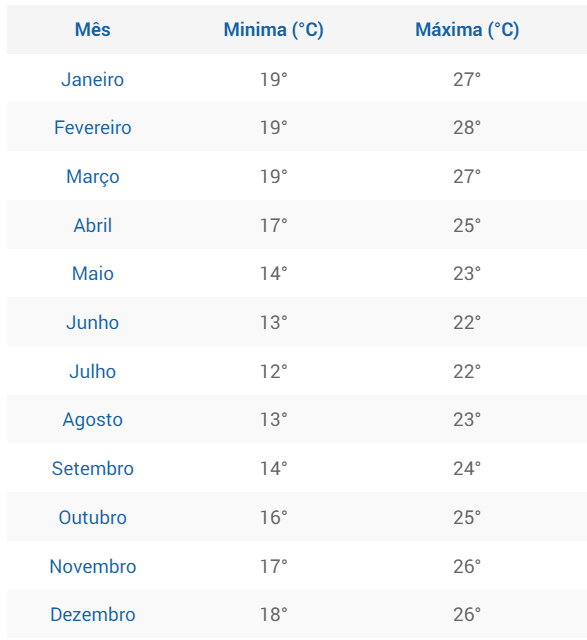

Elabore um programa Python que, a partir das informações da tabela anterior, calcule e exiba a temperatura média para cada mês em São Paulo. Use a função `zip()`.

In [ ]:
# Exercício 02

# Listas necessárias
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
minimas = [19, 19, 19, 17, 14, 13, 12, 13, 14, 16, 17, 18]
maximas = [27, 28, 27, 25, 23, 22, 22, 23, 24, 25, 26, 26]

# Lista com temperaturas médias
temp_media = [(minima + maxima)/2 for (minima, maxima) in zip(minimas, maximas)]

# Saída de dados
print('***Temperatura média em São Paulo***\n')
for (mes, temp) in zip(meses, temp_media):
  print(f'{mes:10.10} {temp:5.1f}°C')

***Temperatura média em São Paulo***

Janeiro     23.0°C
Fevereiro   23.5°C
Março       23.0°C
Abril       21.0°C
Maio        18.5°C
Junho       17.5°C
Julho       17.0°C
Agosto      18.0°C
Setembro    19.0°C
Outubro     20.5°C
Novembro    21.5°C
Dezembro    22.0°C


##**Exercício 03**

Uma empresa de pesquisas precisa tabular os resultados da seguinte enquete realizada junto a uma grande quantidade de organizações:

"Qual o melhor Sistema Operacional para uso em servidores?"

As possíveis respostas são:

* 1 - Windows
* 2 - Unix
* 3 - Linux
* 4 - Netware
* 5 - Mac OS
* 6 - Outro

Você deve desenvolver um programa em Python que leia as respostas da enquete (faça uma simulação usando a função `choice`) e informe o resultado ao final.

Os valores referentes a cada uma das opções devem ser armazenados em uma lista. O programa deverá calcular o percentual de cada uma das respostas e informar o vencedor da enquete.

O formato da saída foi dado pela empresa, e
é o seguinte:

`Sistemas Operacionais - Votos (%)`

`Windows - 1500 (17%)`

 `Unix - 3500 (40%)`

 `Linux - 3000 (34%)`

 `Netware - 500 (5%)`

 `Mac OS - 150 (2%)`

 `Outro- 150 (2%)`

`Total de 8800 votos`

`O Sistema Operacional mais votado foi o Unix, com 3500 votos, correspondendo a 40% dos votos.`

In [ ]:
# Exercício 03
from random import choice

# Sistemas Operacionais
sistemas = ['Windows', 'Unix', 'Linux', 'Netware', 'Mac OS', 'Outro']

# Entrada do número de votos
N = int(input('Digite o número de votos a serem processados: '))

# Geração dos votos
escolhas = list(range(1, len(sistemas) + 1))
votos = [choice(escolhas) for i in range(N)]

# Contagem dos votos
contagem = [votos.count(escolha) for escolha in escolhas]
percentagem = [votos/N for votos in contagem]

# Impressão dos resultados
print('\nSistemas Operacionais - Votos (%)')
for (sistema, num_votos, perc) in zip(sistemas, contagem, percentagem):
  print(f'{sistema:8}\t{num_votos}\t({perc*100:.2f}%)')
print(f'\nTotal de {N} votos')

# Vencedor
vencedor = contagem.index(max(contagem))
print(f'''\nO Sistema Operacional mais votado foi o {sistemas[vencedor]},
          com {contagem[vencedor]} votos,
          correspondendo a {percentagem[vencedor]*100:.2f}% dos votos.''')

Digite o número de votos a serem processados: 6000

Sistemas Operacionais - Votos (%)
Windows 	971	(16.18%)
Unix    	995	(16.58%)
Linux   	975	(16.25%)
Netware 	1051	(17.52%)
Mac OS  	1015	(16.92%)
Outro   	993	(16.55%)

Total de 6000 votos

O Sistema Operacional mais votado foi o Netware,
          com 1051 votos,
          correspondendo a 17.52% dos votos.


##**Exercício 04**

Considere a função $h$ a seguir, definida para todos os reais:

$$h(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

Construa uma lista `listax` contendo 81 valores uniformemente espaçados da coordenada `x` no intervalo $[-4, 4]$.

A seguir, construa uma lista `listah`com os respectivos valores da função $h$ para cada um dos valores armazenados em `listax`. Plote o gráfico da função.

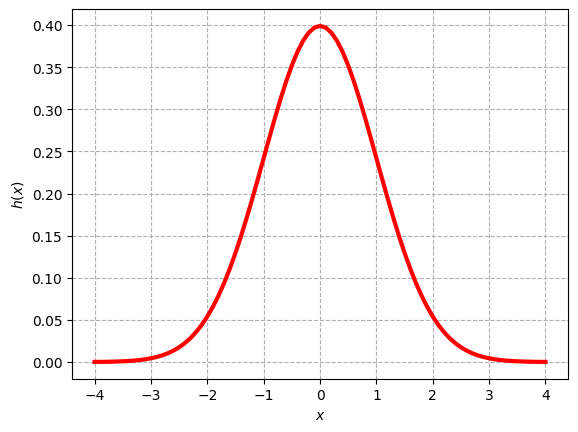

In [ ]:
# Exercício 04

# Bibioteca para construção de gráficos
import matplotlib.pyplot as plt

# Criação de sequência de valores uniformemente espaçados
from numpy import linspace

# Funções matemáticas
from math import sqrt, pi, exp

# Lista de coordenadas x
listax = linspace(start=-4, stop=4, num=81).tolist()

# Lista com coordenadas y = h(x)
listah = [1/sqrt(2*pi)*exp(-1/2*x**2) for x in listax]

# Traçado do gráfico
plt.plot(listax, listah, color='red', linewidth=3)
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.grid(linestyle='--')
plt.show()